## Introduction

Discriminatory practices in mortgage lending have been a concern for regulators in the banking industry. Despite efforts being made to ban bad practices, mordern lending decisions can still reflect underlying baises while appearing objective. To uncover such issues, we are tasked with developing a predictive model that can identify whether a given mortgage loan application is likely to be denied. The main goal with this to uncover potential situations were discrimination is present in lending decisions.

We will use a dataset provided by the Federal Reserve Bank of Boston which contains 2,381 mortgage applications with each containing a dependent variable that indicates whether it was approved or denied along with 12 independent variables. There are 4 numerical continuous variables that include dir, hir, lvr, and uria. There are 2 ordinal numeric variables that include ccs and mcs. There are 7 binary categorical variables that include pbcr, dmi, self, single, condominium, black, and deny. Below is a brief description of each attribute:
- dir: Represents debt payments to total income ratio.
- hir: Represents housing expenses to income ratio.
- lvr: Represents ratio of size of loan to assessed value of property.
- ccs: consumer credit score from 1 (best score) - 6 (worst score).
- mcs: mortgage credit score from 1 (best score) - 4 (worst score).
- pbcr: Indicates whether applicant has public bad credit record.
- dmi: Indicates if mortgage insurance has been denied.
- self: Indicates if applicant is self-employed.
- single: Indicates if applicant is single.
- uria: Refers to 1989 Massachusetts unemployment rate in applicant's industry.
- condominium: Indicates if unit is a condominium.
- black: Indicates if the applicant is black.
- deny: Indicates if applicant's mortgage application was denied.

To achieve our goal, we will take the following series of steps:
1. Loading and inspecting the data into a Pandas dataframe.
2. Conducting EDA to gain insight into the structure of the data, uncover missing values, identify outliers, and examine relationships through visualizations.
3. Preparing and cleaning the data. This includes handling missing values, encoding categorical variables, and performing any necessary forms of data transformations.
4. Selecting relevant features using domain knowledge and feature selection techniques.
5. Constructing training and testing data subsets.
6. Building binomial logistic regression models.
7. Evaluating and comparing model performance using metrics (accuracy, precision, etc).
8. Select and apply the best performing model to the testing set to assess it.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Anthony-Jerez/CS-Uploading-and-Processing-Data/refs/heads/main/HDMA%20Boston%20Housing%20Data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True) # drop unused column
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


## EDA

In [6]:
df.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


Based on the above summary of statistics, we noticed the following:
- Numerical variables don't contain negative values
- Each numerical variable has a frequency equal to the total number of observations, indicating that they don't have null values

In [8]:
df.dtypes

,0
dir,float64
hir,float64
lvr,float64
ccs,float64
mcs,float64
pbcr,object
dmi,object
self,object
single,object
uria,float64


Based on each variable's data type, it's clear that the dataset is composed of categorical and numerical variables.

In [12]:
df.isnull().sum()

,0
dir,0
hir,0
lvr,0
ccs,0
mcs,0
pbcr,1
dmi,0
self,1
single,0
uria,0


Based on the above table, there are only 2 instances where null values occur which are in the pbcr and self attributes.

In [13]:
for column in ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']:
    print(f'{column}: ', end='')
    print(df[column].unique())

pbcr: ['no' 'yes' nan]
dmi: ['no' 'yes']
self: ['no' 'yes' nan]
single: ['no' 'yes']
black: ['no' 'yes']
deny: ['no' 'yes']


We examine the list of all possible domain values for each object binary categorical variable. We discover that only valid possible values include 'no' and 'yes'. Nan was only present in a few cases where actual data wasn't present.

In [22]:
for column in ['ccs', 'mcs', 'comdominiom']:
    print(f'{column}: ', end='')
    print(df[column].unique())

ccs: [5.         2.         1.         6.         3.         4.
 2.11638656]
mcs: [2.        1.        4.        3.        1.7210084]
comdominiom: [0 1]


Based on the above, we can confirm that comdominiom is indeed a binary categorical variable. However, we also noticed that despite the ccs and mcs variables being implied categorical variables, they both contain an additional decimal outlier value that while it satisfies the range of possible values, it's not an integer.

In [31]:
df[np.isclose(df['ccs'], 2.11638656) | np.isclose(df['mcs'], 1.7210084)]

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


Here we can see that there exists only a single row (index 2380) where ccs and mcs contain decimal values. We also noticed that this is the row that contains missing values for both the pbcr and self columns. We can address this issue by performing imputation or dropping the row since it's only 1 row that deals with the multiple issues mentioned before.

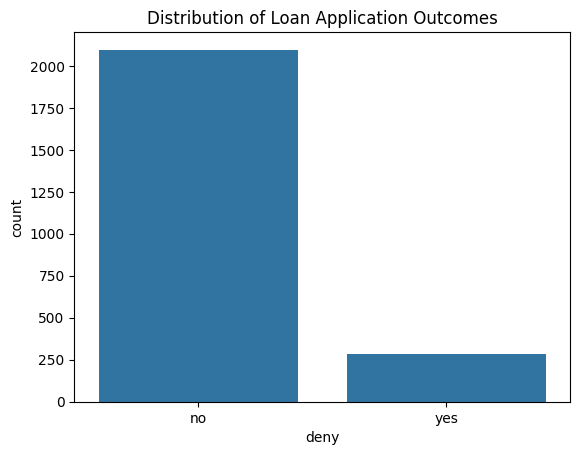

In [47]:
deny_freq = df['deny'].value_counts().reset_index()
deny_freq.columns = ['deny', 'count']
sns.barplot(x='deny', y='count', data=deny_freq)
plt.title('Distribution of Loan Application Outcomes')
plt.show()

Based on the above plot, most applicants' loan applications are not denied. Only a small selective portion of the applicant pool are not granted approval.

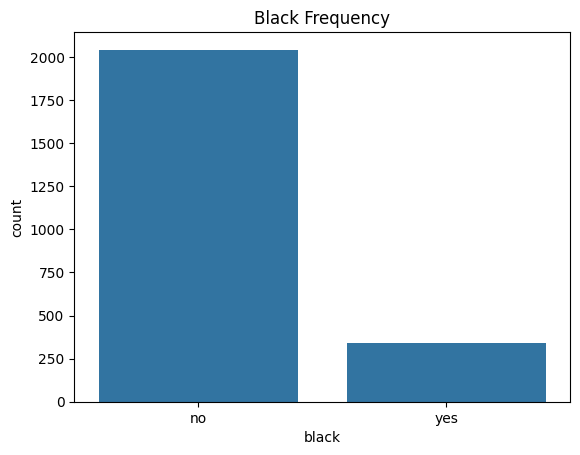

In [48]:
black_freq = df['black'].value_counts().reset_index()
black_freq.columns = ['black', 'count']
sns.barplot(x='black', y='count', data=black_freq)
plt.title('Black Frequency')
plt.show()

Based on the above plot, only a small portion of the applicants idenitfy as black. A majority of the applicants are non-black individuals.

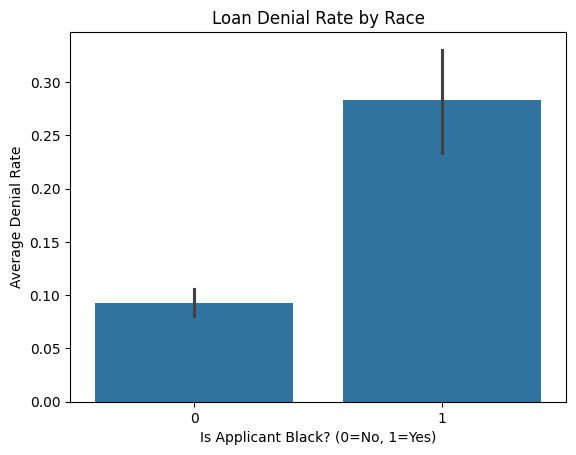

In [49]:
df_copy = df.copy()
# Temporary conversion for visualization
df_copy['deny_binary'] = df_copy['deny'].map({'yes': 1, 'no': 0})
df_copy['black_binary'] = df_copy['black'].map({'yes': 1, 'no': 0})
# Plot denial rate by black
sns.barplot(x='black_binary', y='deny_binary', data=df_copy)
plt.title('Loan Denial Rate by Race')
plt.xlabel('Is Applicant Black? (0=No, 1=Yes)')
plt.ylabel('Average Denial Rate')
plt.show()

Based on the above plot, black applicants are denied at a significantly higher rate compared to other individuals. This still occurs despite the previous plot showing that only a small portion of the applicant pool identify as black.

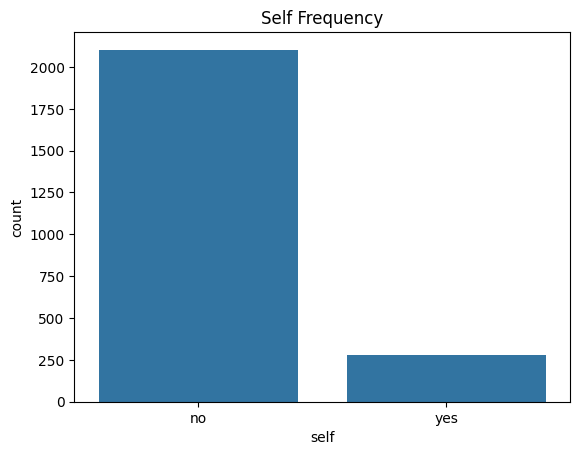

In [50]:
self_freq = df['self'].value_counts().reset_index()
self_freq.columns = ['self', 'count']
sns.barplot(x='self', y='count', data=self_freq)
plt.title('Self Frequency')
plt.show()

Based on the above plot, most of the applicants are not self-employed.

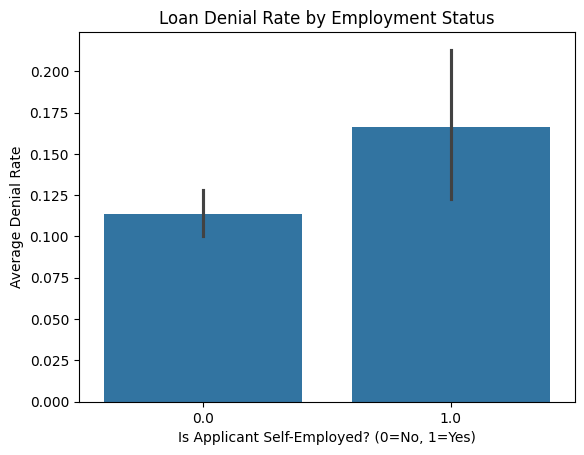

In [46]:
df_copy = df.copy()
# Temporary conversion for visualization
df_copy['deny_binary'] = df_copy['deny'].map({'yes': 1, 'no': 0})
df_copy['self_binary'] = df_copy['self'].map({'yes': 1, 'no': 0})
# Plot Denial Rate by Employment Status
sns.barplot(x='self_binary', y='deny_binary', data=df_copy)
plt.title('Loan Denial Rate by Employment Status')
plt.xlabel('Is Applicant Self-Employed? (0=No, 1=Yes)')
plt.ylabel('Average Denial Rate')
plt.show()

Based on the above plot, self-employed applicants face higher rejection rates compared to those who don't identify as self-employed.

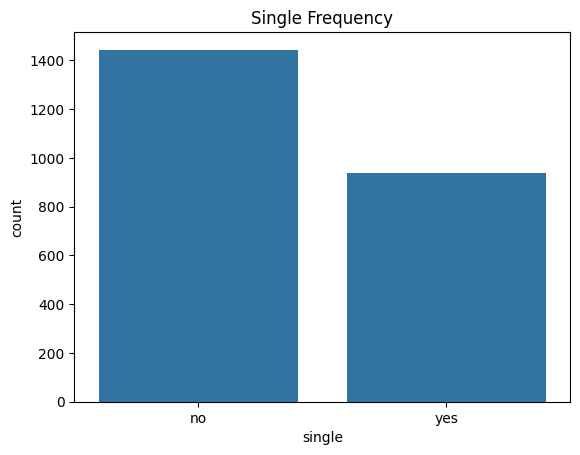

In [51]:
single_freq = df['single'].value_counts().reset_index()
self_freq.columns = ['single', 'count']
sns.barplot(x='single', y='count', data=single_freq)
plt.title('Single Frequency')
plt.show()

Based on the above plot, it appears that more married people submit mortgage applications when compared to single people.

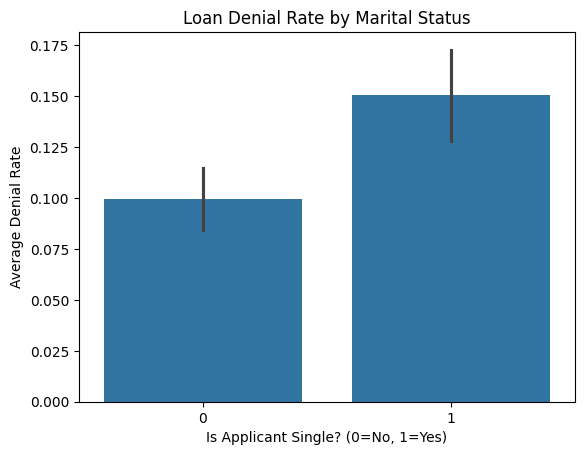

In [52]:
df_copy = df.copy()
# Temporary conversion
df_copy['deny_binary'] = df_copy['deny'].map({'yes': 1, 'no': 0})
df_copy['single_binary'] = df_copy['single'].map({'yes': 1, 'no': 0})
# Bar plot Denial rate by marital status
sns.barplot(x='single_binary', y='deny_binary', data=df_copy)
plt.title('Loan Denial Rate by Marital Status')
plt.xlabel('Is Applicant Single? (0=No, 1=Yes)')
plt.ylabel('Average Denial Rate')
plt.show()

Based on the above plot, single applicants are denied at a higher rate when compared to married applicants.

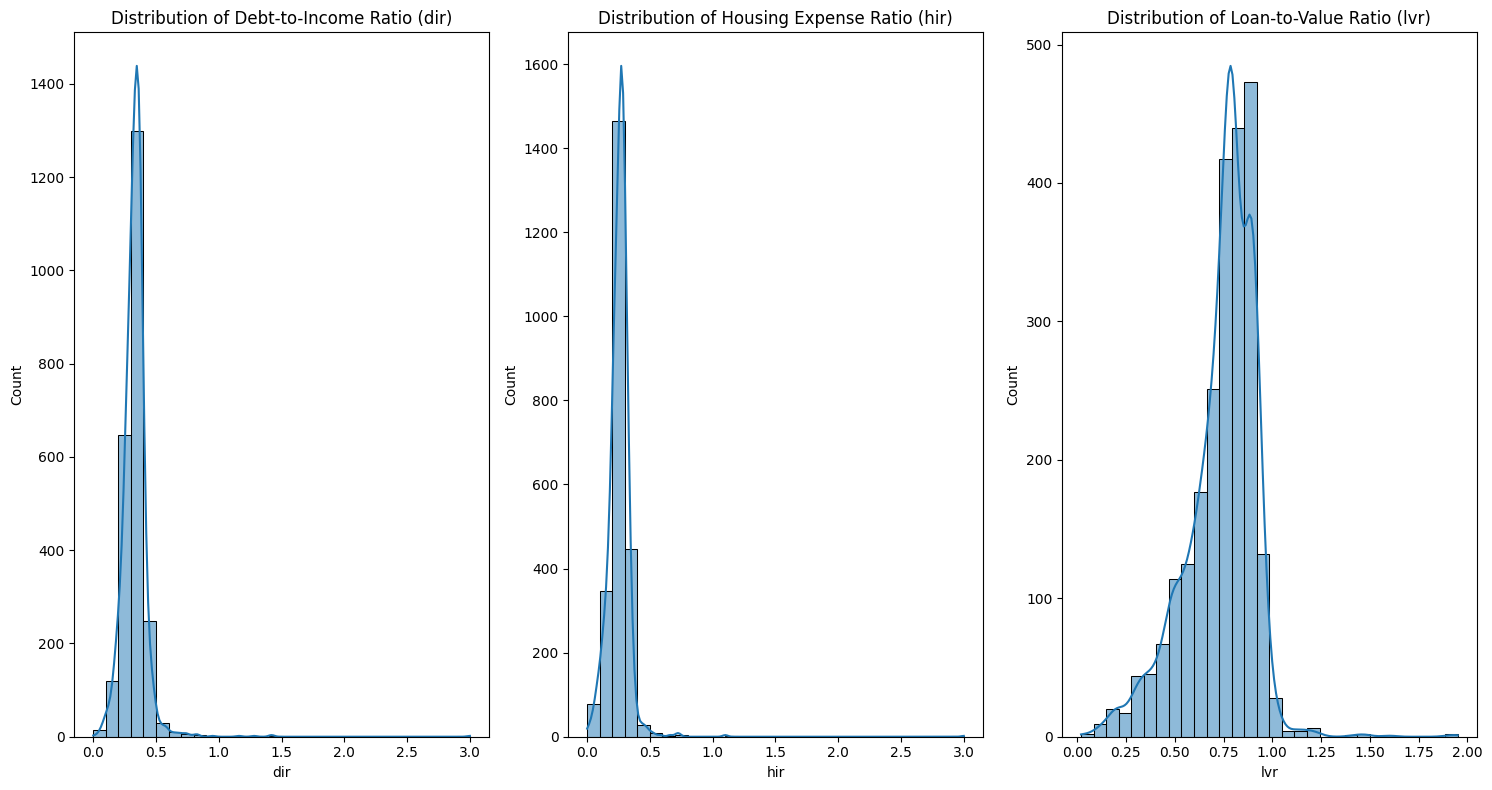

In [57]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
sns.histplot(df['dir'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Income Ratio (dir)')
plt.subplot(1, 3, 2)
sns.histplot(df['hir'], bins=30, kde=True)
plt.title('Distribution of Housing Expense Ratio (hir)')
plt.subplot(1, 3, 3)
sns.histplot(df['lvr'], bins=30, kde=True)
plt.title('Distribution of Loan-to-Value Ratio (lvr)')
plt.tight_layout()
plt.show()

Based on the above plots, we noticed the following:
- The values for the dir ratios are mostly between the range of 0 and 0.5.
- The values for the hir ratios are mostly between the range of 0 and 0.5.
- The values for the lvr ratios are mostly between the range of 0 and 1. The plot appears to be left-skewed as well.

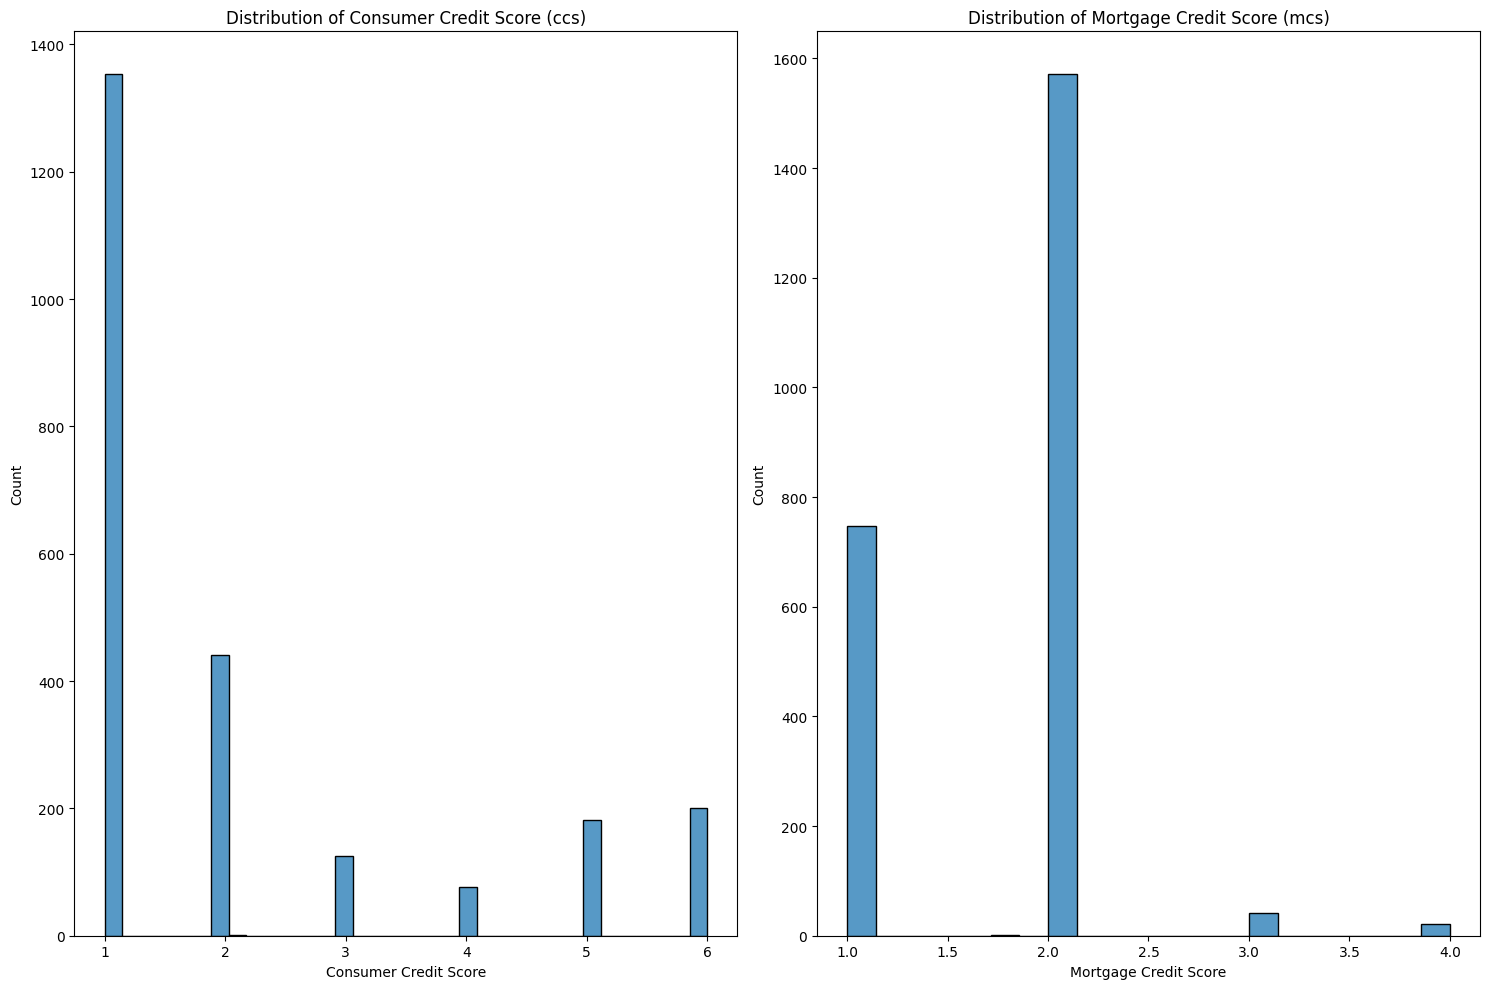

In [62]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.histplot(df['ccs'])
plt.title('Distribution of Consumer Credit Score (ccs)')
plt.xlabel('Consumer Credit Score')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.histplot(df['mcs'])
plt.title('Distribution of Mortgage Credit Score (mcs)')
plt.xlabel('Mortgage Credit Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the above plots, we noticed the following:
- The most prevalent consumer credit scores are 1 followed by 2, implying that most applicants apply with a good consumer credit score.
- The most prevalent mortgage credit scores are 2 followed by 1. This also indicates that most applicants apply with a good mortgage credit score.

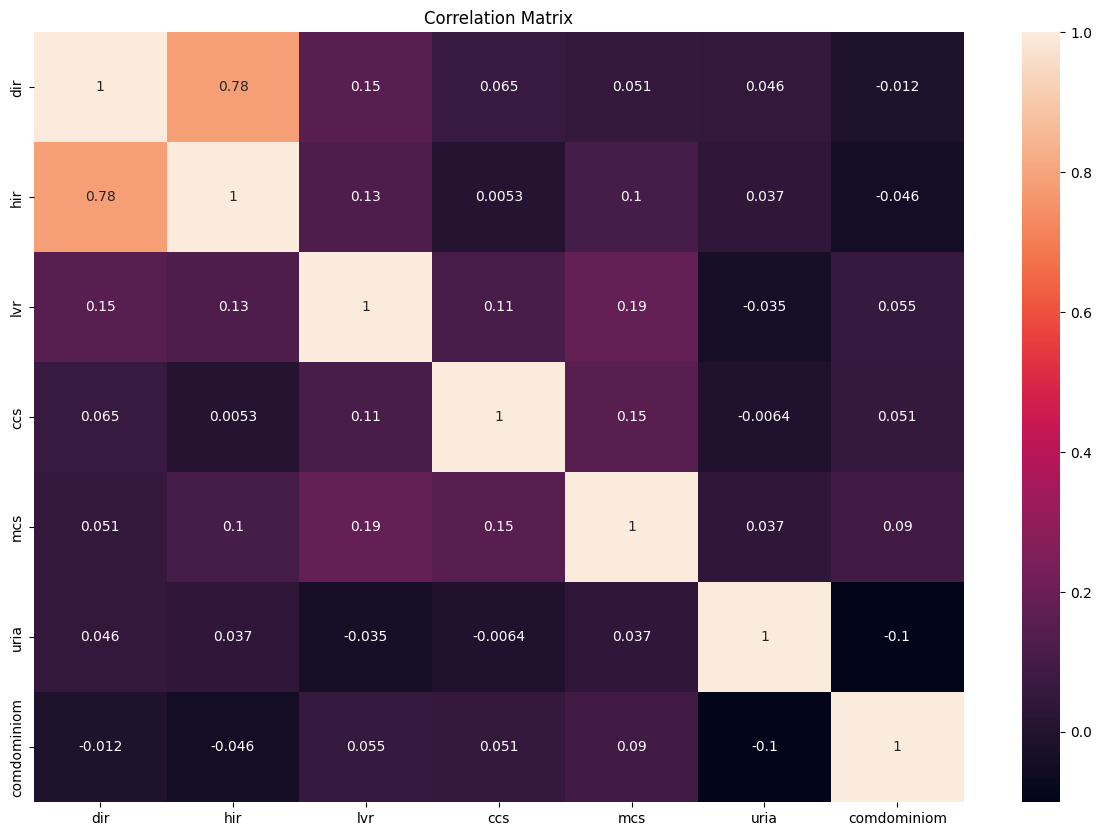

In [73]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

Based on the above plot, the attributes dir and hir appear to have a strong relation.

## Data Preparation

In [80]:
df = df.drop(index=2380).reset_index(drop=True)

We dropped the problematic row (index 2380) that had outlier decimal values in ccs and mcs while also containing missing values in pbcr and self.

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Features that are truly continuous
continuous_cols = ['dir', 'hir', 'lvr', 'uria']
# Scale them
scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [92]:
scaler = MinMaxScaler()
# Scale the rest of numeric features
df[['ccs', 'mcs']] = scaler.fit_transform(df[['ccs', 'mcs']])

The features specified above are on very different scales. To ensure better logistic regression model performance, we scale them.

In [94]:
binary_cols = ['pbcr','dmi','single','black','deny','self']
for col in binary_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1})

We peformed binary encoding on all the binary categorical variables. Unlike, one-hot encoding which creates seperate columns for each category, binary encoding is more efficient here for two-level categorical variables to avoid the issue of multicollinearity.

## Prepped Data Review

In [97]:
df.describe()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.110271,0.085115,0.371905,0.223277,0.240336,0.073529,0.020168,0.116387,0.393277,0.224375,0.288235,0.142437,0.119748
std,0.035752,0.032219,0.092617,0.333344,0.179094,0.261058,0.140604,0.320755,0.488580,0.230348,0.453036,0.349571,0.324735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093333,0.071333,0.327814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147727,0.000000,0.000000,0.000000
50%,0.110000,0.086667,0.393542,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.159091,0.000000,0.000000,0.000000
75%,0.123333,0.099608,0.439616,0.200000,0.333333,0.000000,0.000000,0.000000,1.000000,0.238636,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After finishing the data preparation and cleaning step, continuous variables (dir, hir, lvr, uria) were scaled to be normalized within the range of 0 and 1. Ordinal features ccs and mcs were also scaled to maintain consistency with the other scaled numeric features while retaining their rank order.

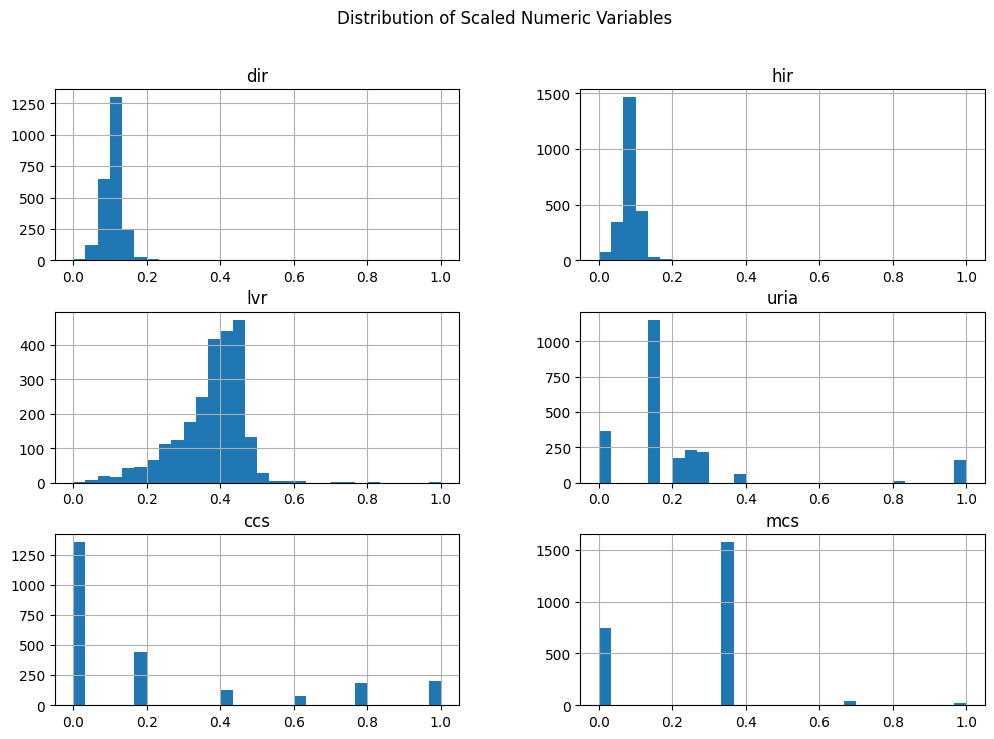

In [99]:
scaled_cols = ['dir', 'hir', 'lvr', 'uria', 'ccs', 'mcs']
df[scaled_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Scaled Numeric Variables')
plt.show()

As shown in the plots above, the range for the numeric variables were shortened to be between 0 and 1. This applies to the features ccs and mcs but their implied rank order was still retained as shown above.

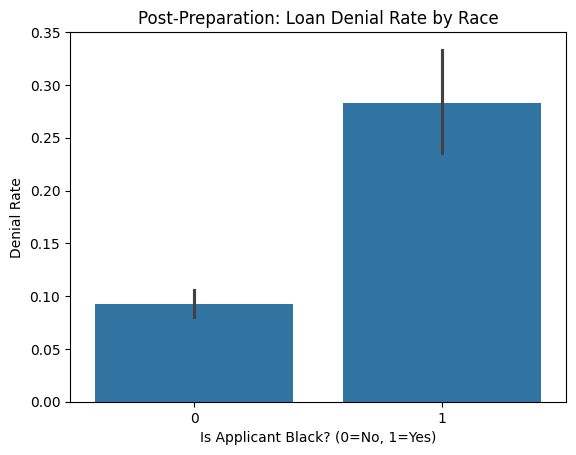

In [102]:
sns.barplot(x='black', y='deny', data=df)
plt.title('Post-Preparation: Loan Denial Rate by Race')
plt.xlabel('Is Applicant Black? (0=No, 1=Yes)')
plt.ylabel('Denial Rate')
plt.show()

Now that we have the changes permanent, we're able to easily identify a pattern within the relationship of the variables black and deny. Once again, we can see that black identified applicants are denied at a higher rate.

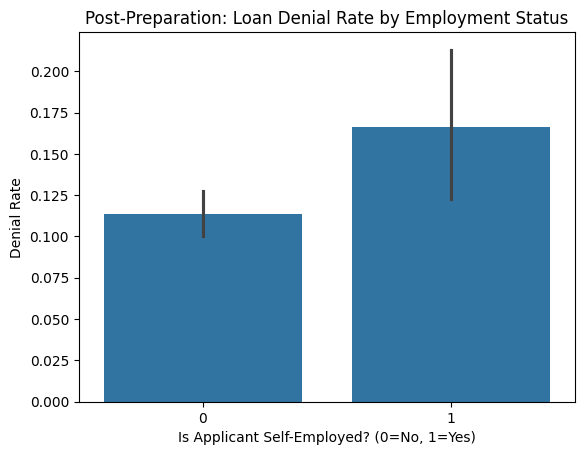

In [104]:
sns.barplot(x='self', y='deny', data=df)
plt.title('Post-Preparation: Loan Denial Rate by Employment Status')
plt.xlabel('Is Applicant Self-Employed? (0=No, 1=Yes)')
plt.ylabel('Denial Rate')
plt.show()

Now that we have the changes permanent, we're able to easily identify a pattern within the relationship of the variables self-employed and deny. Once again, we can see that self-employed identified applicants are denied at a higher rate.

## Regression Modeling

In [130]:
# SelectKBest feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define features and target
X = df.drop('deny', axis=1)
y = df['deny']
# Apply SelectKBest
k = 7
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X, y)
# Get selected features
selected_features = X.columns[selector.get_support()].tolist()
print("Top", k, "features:", selected_features)
# Show scores for all features
scores_df = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)
print("\nAll Feature Scores:")
print(scores_df)

Top 7 features: ['dir', 'hir', 'lvr', 'ccs', 'pbcr', 'dmi', 'black']

All Feature Scores:
        Feature     Score
6           dmi  0.035343
2           lvr  0.029593
0           dir  0.026656
11        black  0.024259
5          pbcr  0.020858
3           ccs  0.016420
1           hir  0.012486
8        single  0.003080
7          self  0.000000
4           mcs  0.000000
9          uria  0.000000
10  comdominiom  0.000000


We used SelectKBest along with the mutual_info_classif scoring function to select the features. This approach ranked features by the amount of meaningful information that they would provide about the target deny variable. The top 7 selected features included dir, hir, lvr, ccs, pbcr, dmi, and black.

In [136]:
# Backward selection
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

# Define features and target
X = df.drop('deny', axis=1)
y = df['deny']
feature_names = list(X.columns)

# Backward selection (starts with all features and remove worst one at each step)
feature_selector = SequentialFeatureSelector(
  LogisticRegression(solver='liblinear'),
  k_features=7,
  forward=False,
  scoring='accuracy',
  cv=4
)
feature_filtered = feature_selector.fit(X.values, y.values)
selected_indices = list(feature_filtered.k_feature_idx_)
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Selected features:", selected_feature_names)

Selected features: ['lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'single', 'black']


As a second approach to feature selection, I applied backward selection using a logistic regression model, 4-fold cross-validation, and accuracy as the scoring metric. This resulted in the following selected features: 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'single', and 'black'.

In [ ]:
# Manual Feature selection
manual_selected_features = ['lvr', 'ccs', 'dir', 'pbcr', 'dmi', 'single', 'black']

As a third approach, I used a manual feature selection approach guided by domain knowledge and patterns observed during EDA. Features were selected based on their financial relevance and potential connection, and general importance in lending risk assessment.

In [137]:
manual_selected_features = ['lvr', 'ccs', 'dir', 'pbcr', 'dmi', 'single', 'black'] # manual
kbest_selected_features = selected_features # SelectKBest
backward_selected_features = selected_feature_names # Backward

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def evaluate_model(name, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LogisticRegression(solver='liblinear')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"--- {name} ---")
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:   ", recall_score(y_test, y_pred))
  print("F1 Score: ", f1_score(y_test, y_pred))
  print()

In [139]:
X = df.drop('deny', axis=1)
y = df['deny']

evaluate_model("Manual Selection", X[manual_selected_features], y)
evaluate_model("SelectKBest", X[kbest_selected_features], y)
evaluate_model("Backward Selection", X[backward_selected_features], y)

--- Manual Selection ---
Accuracy:  0.9096638655462185
Precision: 0.85
Recall:    0.2982456140350877
F1 Score:  0.44155844155844154

--- SelectKBest ---
Accuracy:  0.9096638655462185
Precision: 0.8888888888888888
Recall:    0.2807017543859649
F1 Score:  0.4266666666666667

--- Backward Selection ---
Accuracy:  0.9096638655462185
Precision: 0.85
Recall:    0.2982456140350877
F1 Score:  0.44155844155844154



For each model, logistic regression was trained on 80% training split and evaluated on 20% testing split. All models achieved an accuracy of about 90%, with precision and F1 scores differing slightly based on the feature set.

## Select Models

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

X = df.drop('deny', axis=1)
y = df['deny']
# Final train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
manual_features = ['lvr', 'ccs', 'dir', 'pbcr', 'dmi', 'single', 'black']
kbest_features = selected_features  # from your earlier SelectKBest
backward_features = selected_feature_names  # from your backward selector

def cross_validate_model(name, X_subset, y):
  model = LogisticRegression(solver='liblinear')
  scores = cross_val_score(model, X_subset, y, cv=5, scoring='f1')
  print(f"{name} - Cross-Validated F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")

cross_validate_model("Manual Selection", X_train[manual_features], y_train)
cross_validate_model("SelectKBest", X_train[kbest_features], y_train)
cross_validate_model("Backward Selection", X_train[backward_features], y_train)
final_model = LogisticRegression(solver='liblinear')
final_model.fit(X_train[manual_features], y_train)
# Classification report
y_pred = final_model.predict(X_test[manual_features])
print(classification_report(y_test, y_pred))

Manual Selection - Cross-Validated F1 Score: 0.3653 (+/- 0.0957)
SelectKBest - Cross-Validated F1 Score: 0.3629 (+/- 0.1035)
Backward Selection - Cross-Validated F1 Score: 0.3755 (+/- 0.0965)
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       419
           1       0.85      0.30      0.44        57

    accuracy                           0.91       476
   macro avg       0.88      0.65      0.70       476
weighted avg       0.90      0.91      0.89       476



In [143]:
# Show coefficients for final model
final_model = LogisticRegression(solver='liblinear')
final_model.fit(X_train[manual_features], y_train)
coefficients = pd.DataFrame({
  'Feature': manual_features,
  'Coefficient': final_model.coef_[0]
})
print(coefficients)

  Feature  Coefficient
0     lvr     1.935438
1     ccs     1.417455
2     dir     1.639051
3    pbcr     1.147635
4     dmi     3.606621
5  single     0.427827
6   black     0.769447


A positive coefficient indicates that the feature increase the chance of a loan being denied. For example, higher values of dmi increase denial probability which makes sense. The magnitude of coefficients indicates feature importance. Variables dmi and pbcr have stronger effects than single or black although all selected feature show contributions. Across all models, the most influential features remained fairly consistent. Variable features like dmi, pbcr, and black were selected by all or most feature selection methods and retained positive coefficients.

Model Selection Criteria:
- Compared using F1 score which balance precision and recall.
- Considered feature coherence.

Preferred Model:
Manuel Selection was preferred due to having a great f1 score and made use of well-justified policy-relevant features


## Conclusion

I applied various feature selection techniques to identify the most influential features for predicting mortgage denial. Each technique produced slightly different sets of features, yet some variable features like dmi, pbcr, and black consistently appeared, proving a strong relation with the target outcome. Ultimately, the manual selected features model was preferred due to its strong performance.